# **D212 Task 2** | Dimensionality Reduction

In [1]:
import pandas as pd #dataframes
import numpy as np #arrays
import seaborn as sns #visualizations
from matplotlib import pyplot as plt #visualizations

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
from sklearn.preprocessing import RobustScaler

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('churn_clean.csv')
df.head(3)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3


### **drop non-continuous variables**

In [5]:
df.drop(columns=['CaseOrder', 
                 'Customer_id', 
                 'Interaction', 
                 'UID'],
                 inplace=True)
df.head(3)

,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,...,159.947583,2054.706961,4,4,2,4,4,3,3,3


In [6]:
df.drop(columns=['City', 
                 'State', 
                 'County', 
                 'Zip'],
                 inplace=True)
df.head(3)

,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,...,159.947583,2054.706961,4,4,2,4,4,3,3,3


In [7]:
df.drop(columns=['Area', 
                'TimeZone',
                'Job'],
                 inplace=True)
df.head(3)

,Lat,Lng,Population,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,56.25100,-133.37571,38,0,68,28561.99,Widowed,Male,No,7.978323,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,44.32893,-84.24080,10446,1,27,21704.77,Married,Female,Yes,11.699080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,45.35589,-123.24657,3735,4,50,9609.57,Widowed,Female,No,10.752800,...,159.947583,2054.706961,4,4,2,4,4,3,3,3


### **here we can separate numerical data from categorical data**
- didn't know I could do this, so I was dropping them one at a time

In [12]:
numerical_df = df.select_dtypes(exclude = 'object')
numerical_df.columns

Index(['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [13]:
numerical_df.shape

(10000, 21)

In [16]:
object_df = df.select_dtypes('object')
object_df.columns

Index(['Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [17]:
object_df.shape

(10000, 18)

In [18]:
df = numerical_df

In [19]:
df.columns

Index(['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [20]:
df.shape

(10000, 21)

In [23]:
df.drop(columns=['Children', 
                 'Item1', 
                 'Item2', 
                 'Item3', 
                 'Item4', 
                 'Item5', 
                 'Item6', 
                 'Item7', 
                 'Item8'],
                 inplace=True)
df.head(3)

,Lat,Lng,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,56.25100,-133.37571,38,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,44.32893,-84.24080,10446,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,45.35589,-123.24657,3735,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961


In [24]:
df.shape

(10000, 12)

In [25]:
df.dtypes

Lat                     float64
Lng                     float64
Population                int64
Age                       int64
Income                  float64
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

In [26]:
df.isnull().sum()

Lat                     0
Lng                     0
Population              0
Age                     0
Income                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

## **Correlaton Heatmap**

In [29]:
corr = df.corr()

In [28]:
from sklearn import preprocessing

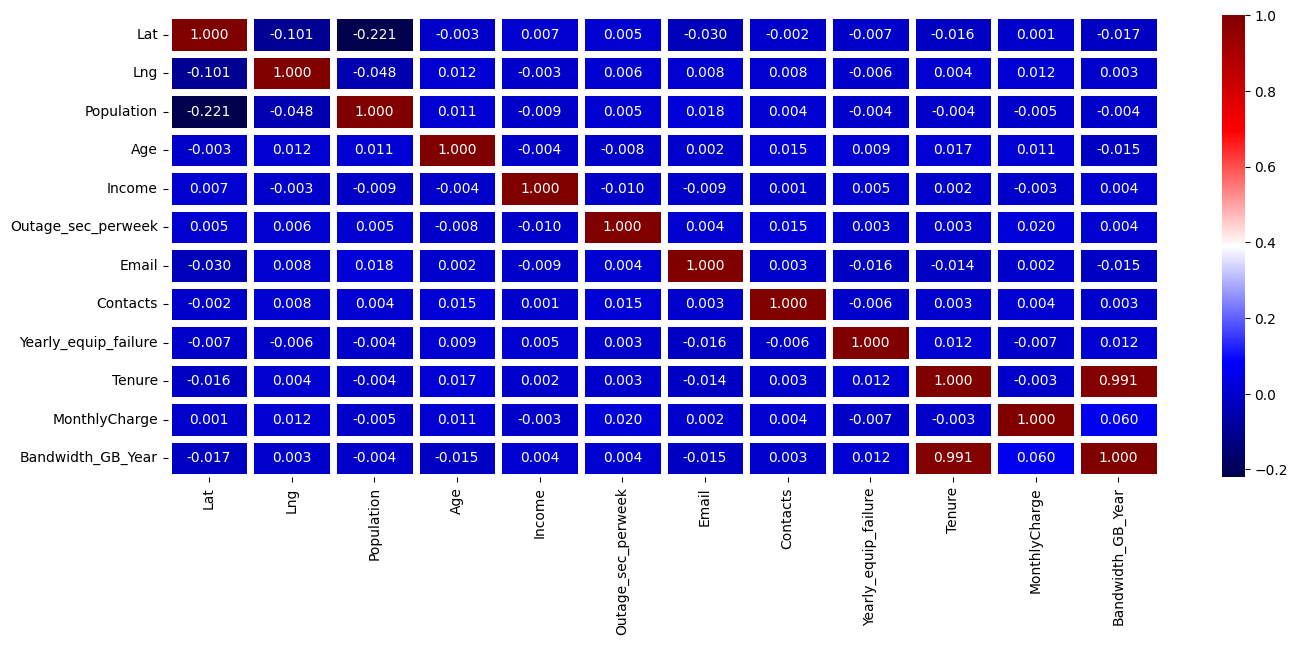

In [34]:
x = plt.subplots(figsize=(16, 6))
sns.heatmap(corr, cmap='seismic', linewidth=5, annot=True, fmt='.3f')
plt.show()

## **Data Normalization**

In [36]:
robust = RobustScaler()
scaled_data = robust.fit_transform(df)
scaled_data

array([[ 2.49150047, -2.67486933, -0.23109413, ..., -0.53461297,
         0.08181679, -0.54601855],
       [ 0.72920498,  0.21642847,  0.60623492, ..., -0.63988949,
         1.23689002, -0.56982572],
       [ 0.88100806, -2.07882957,  0.06633146, ..., -0.36735607,
        -0.12405657, -0.28159143],
       ...,
       [-0.57285501, -0.73690422, -0.20148833, ...,  0.22378478,
         0.04097408,  0.20226104],
       [-0.85965576,  0.16396251,  2.62787611, ...,  0.66586433,
         1.40134341,  0.73314055],
       [-0.69296594,  0.25787352,  0.74975865, ...,  0.52127068,
         0.82295943,  0.59269989]])

## **Create & Apply PCA**
- scaled data set
- 12 original variables

In [39]:
pca = PCA(n_components = 12)
pca_model = pca.fit_transform(scaled_data)
pca_model

array([[-1.30748989,  3.21828787, -0.37950074, ..., -0.38451102,
        -0.47883292, -0.02263541],
       [-0.17980335, -0.09891778, -0.55667452, ...,  0.81208964,
        -0.46239552, -0.02408867],
       [-0.63316987,  2.12575986, -0.92155629, ...,  0.10332422,
        -0.46924792,  0.03981557],
       ...,
       [-0.59437105,  0.3754556 ,  0.22421688, ...,  0.13743195,
        -0.47443293, -0.04965589],
       [ 2.1987375 , -0.56489769, -0.69266102, ...,  0.42245481,
        -0.00718636, -0.0401424 ],
       [ 0.36075701, -0.69557242, -0.96908427, ...,  0.70315498,
         0.01372041, -0.02284259]])

## **Loading Matrix**

In [41]:
loading_matrix = pd.DataFrame(pca.components_.T, columns=[
            'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
             index=df.columns).T
loading_matrix

,Lat,Lng,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
PC1,-0.257290,-0.048289,0.964702,0.006363,-0.012815,0.004480,0.023713,0.002020,-0.002291,-0.000641,-0.004664,-0.000819
PC2,0.335223,-0.939236,0.043795,-0.012438,0.025845,-0.011272,-0.041878,-0.006494,0.004650,-0.010933,-0.022802,-0.011723
PC3,-0.005011,0.029332,0.014818,-0.004242,0.996728,-0.051919,-0.048642,0.000575,0.010996,0.006704,-0.011307,0.007412
PC4,-0.471114,-0.207835,-0.155309,-0.003735,0.038165,-0.160069,0.825117,-0.002072,-0.021890,-0.023423,-0.034310,-0.024792
PC5,-0.189695,-0.043080,-0.042485,0.008944,-0.063610,-0.915859,-0.307573,-0.017844,0.014994,0.005525,-0.149180,-0.001094
PC6,-0.736299,-0.260517,-0.199055,-0.012782,-0.000533,0.314970,-0.449596,0.002143,0.059498,0.138641,0.070710,0.145258
PC7,0.099206,0.005696,0.029580,0.023429,-0.002112,-0.174296,0.086674,0.003829,-0.005083,0.403791,0.768164,0.444570
PC8,-0.103304,-0.035388,-0.024830,0.012750,0.009331,-0.049711,-0.090597,-0.000847,-0.064410,-0.554806,0.614428,-0.535770
PC9,0.027979,0.012730,0.009139,0.046818,-0.008472,-0.011105,0.044915,-0.010438,0.994633,-0.042188,0.040100,-0.042140
PC10,0.006036,0.015592,0.009203,-0.996879,-0.005605,-0.015636,0.003927,-0.050211,0.044466,-0.015157,0.025529,0.014051


In [42]:
# .T allows for 'PC' titles to be arranged vertically and variable names to be arranged horizontally

In [73]:
loading_matrix = pd.DataFrame(pca.components_.T, columns=df.columns,
             index=df.columns).T
loading_matrix

,Lat,Lng,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
Lat,-0.257290,-0.048289,0.964702,0.006363,-0.012815,0.004480,0.023713,0.002020,-0.002291,-0.000641,-0.004664,-0.000819
Lng,0.335223,-0.939236,0.043795,-0.012438,0.025845,-0.011272,-0.041878,-0.006494,0.004650,-0.010933,-0.022802,-0.011723
Population,-0.005011,0.029332,0.014818,-0.004242,0.996728,-0.051919,-0.048642,0.000575,0.010996,0.006704,-0.011307,0.007412
Age,-0.471114,-0.207835,-0.155309,-0.003735,0.038165,-0.160069,0.825117,-0.002072,-0.021890,-0.023423,-0.034310,-0.024792
Income,-0.189695,-0.043080,-0.042485,0.008944,-0.063610,-0.915859,-0.307573,-0.017844,0.014994,0.005525,-0.149180,-0.001094
Outage_sec_perweek,-0.736299,-0.260517,-0.199055,-0.012782,-0.000533,0.314970,-0.449596,0.002143,0.059498,0.138641,0.070710,0.145258
Email,0.099206,0.005696,0.029580,0.023429,-0.002112,-0.174296,0.086674,0.003829,-0.005083,0.403791,0.768164,0.444570
Contacts,-0.103304,-0.035388,-0.024830,0.012750,0.009331,-0.049711,-0.090597,-0.000847,-0.064410,-0.554806,0.614428,-0.535770
Yearly_equip_failure,0.027979,0.012730,0.009139,0.046818,-0.008472,-0.011105,0.044915,-0.010438,0.994633,-0.042188,0.040100,-0.042140
Tenure,0.006036,0.015592,0.009203,-0.996879,-0.005605,-0.015636,0.003927,-0.050211,0.044466,-0.015157,0.025529,0.014051


## **Screeplot with Elbow Method**

### proportion of explained variance: 

In [43]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.21334604, 0.12503905, 0.10430996, 0.08771439, 0.08655625,
       0.0842252 , 0.07725646, 0.07296015, 0.06122962, 0.05013718,
       0.03700236, 0.00022334])

In [44]:
p_components = np.arange(pca.n_components_) + 1
p_components

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### scree plot

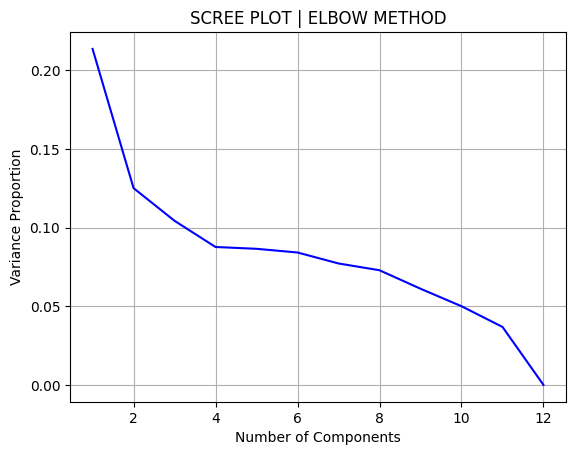

In [45]:
plt.figure()
plt.plot(p_components, exp_var, 'b-')
plt.title('SCREE PLOT | ELBOW METHOD')
plt.xlabel('Number of Components')
plt.ylabel('Variance Proportion')
plt.grid()
plt.show()

## **Kaiser Criteron with Scree Plot**

In [52]:
eigenvalues = np.linalg.eigvals(loading_matrix)

In [55]:
eigenvalues = np.sort(eigenvalues)[::-1]

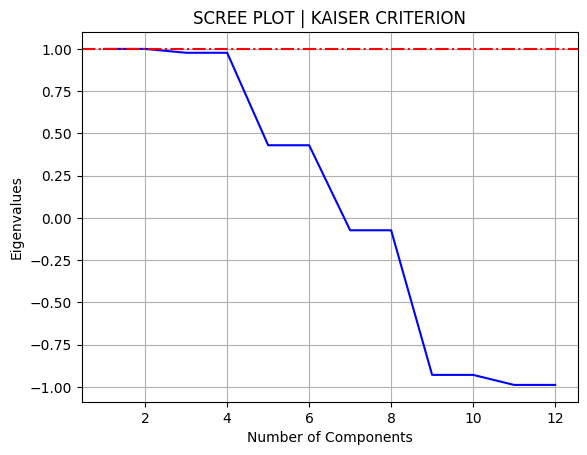

In [56]:
plt.figure()
plt.plot(p_components, eigenvalues, 'b-')
plt.title('SCREE PLOT | KAISER CRITERION')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='r', linestyle='dashdot')
plt.grid()
plt.show()

## **Export scaled data**

In [58]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Lat,Lng,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,2.491500,-2.674869,-0.231094,0.416667,-0.135462,-0.516350,-0.50,-0.5,1.0,-0.534613,0.081817,-0.546019
1,0.729205,0.216428,0.606235,-0.722222,-0.337018,0.425311,0.00,-0.5,1.0,-0.639889,1.236890,-0.569826
2,0.881008,-2.078830,0.066331,-0.083333,-0.692535,0.185824,-0.75,-0.5,1.0,-0.367356,-0.124057,-0.281591
3,-0.950311,-1.725848,0.881134,-0.138889,-0.418717,1.238837,0.75,0.5,0.0,-0.342468,-0.782281,-0.256331
4,-1.480497,-0.464158,0.679123,0.833333,0.202919,-0.473555,1.00,0.5,1.0,-0.630288,-0.288639,-0.691557


In [59]:
scaled_df.to_csv('scaled_dataframe_pca.csv', index=False)

## **Refit PCA with 2 components**

In [66]:
pca_2 = PCA(n_components = 2)
pca_model_2 = pca_2.fit_transform(scaled_data)
pca_model_2

array([[-1.30748989,  3.21828787],
       [-0.17980335, -0.09891778],
       [-0.63316987,  2.12575986],
       ...,
       [-0.59437105,  0.3754556 ],
       [ 2.1987375 , -0.56489769],
       [ 0.36075701, -0.69557242]])

In [67]:
pca_model_2.shape

(10000, 2)

In [68]:
exp_var_2 = pca_2.explained_variance_ratio_
exp_var_2

array([0.21334604, 0.12503905])

In [79]:
total_variance = np.sum(exp_var_2)

In [80]:
total_variance

0.33838508215174223

In [81]:
loadings_2 = pca_2.components_

In [88]:
loadings_2_df = pd.DataFrame(loadings_2, columns=scaled_df.columns)

In [83]:
print("Loadings of features on each principal component: ")
loadings_2_df

Loadings of features on each principal component: 


,Lat,Lng,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.257290,-0.048289,0.964702,0.006363,-0.012815,0.004480,0.023713,0.002020,-0.002291,-0.000641,-0.004664,-0.000819
1,0.335223,-0.939236,0.043795,-0.012438,0.025845,-0.011272,-0.041878,-0.006494,0.004650,-0.010933,-0.022802,-0.011723


In [90]:
loadings_2_df.max(axis=1)

0    0.964702
1    0.335223
dtype: float64

In [91]:
loadings_2_df.min(axis=1)

0   -0.257290
1   -0.939236
dtype: float64